In [1]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import analysis.model_assessment
import pickle
import matplotlib.pyplot as plt

In [2]:
data = np.load('../train_no_clouds.npz')
refls = data['output_rfl']
wv = data['output_wv']
fids = data['output_idx']

values, counts = np.unique(fids, return_counts=True)
scenes = np.split(refls, 743)
wv_by_scene = np.split(wv, 743)
scenes = np.array(scenes)
wv_by_scene = np.array(wv_by_scene)

print(scenes.shape)
print(wv_by_scene.shape)

(743, 1242, 285)
(743, 1242)


In [3]:
np.random.seed(42)
X_idx = np.random.choice(743, 5)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X test: ', X_test.shape)
print('y test : ', y_test.shape)
print('X train index: ', X_train_idx) 
print('y train index: ', y_train_idx) 
print('X test index: ', X_test_idx) 
print('y test index: ', y_test_idx) 

X train:  (4968, 285)
y train:  (4968,)
X test:  (1242, 285)
y test :  (1242,)
X train index:  [270 435  71 102]
y train index:  [270 435  71 102]
X test index:  [106]
y test index:  [106]


(array([5.41000e+02, 2.70800e+03, 9.14072e+05, 2.38700e+03, 9.82000e+02,
        3.15000e+02, 1.29500e+03, 1.64000e+02, 1.68000e+02, 1.74000e+02]),
 array([-18.10269928,  -9.79184036,  -1.48098145,   6.82987747,
         15.14073639,  23.45159531,  31.76245422,  40.07331314,
         48.38417206,  56.69503098,  65.00588989]),
 <BarContainer object of 10 artists>)

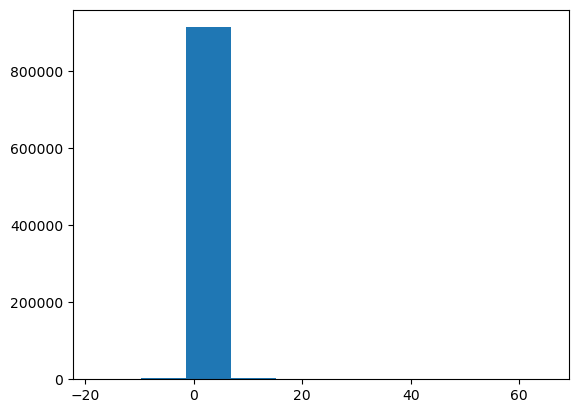

In [4]:
plt.hist(wv_by_scene.flatten())

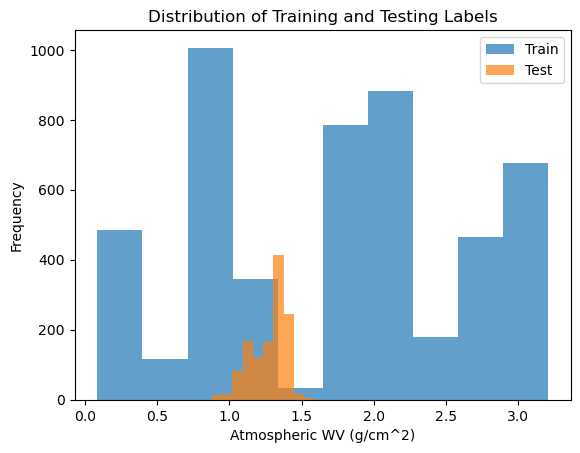

In [5]:
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

In [6]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

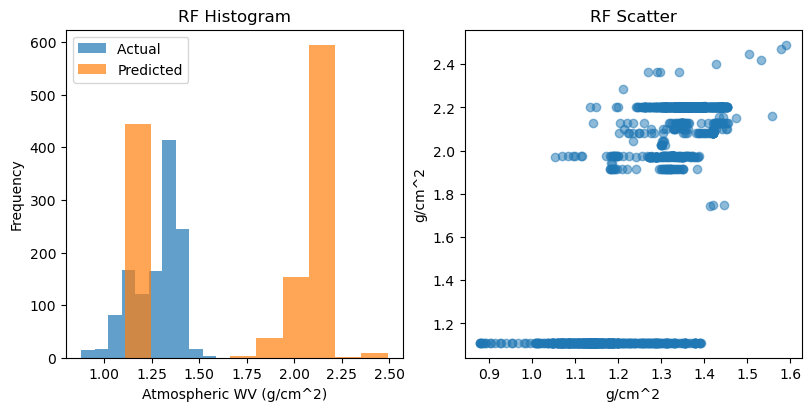

In [8]:
analysis.model_assessment.plot_hist_and_scatter(y_test, y_pred, 'RF Histogram', 'RF Scatter')